In [31]:
import numpy as np
import pandas as pd 
from sklearn import preprocessing 
from matplotlib import pyplot as plt
%matplotlib inline
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [5]:
train_df = pd.read_csv(
    'F:\\SACHIN\\Study\\Projects\\ML_Data\\titanic kaggle\\train.csv')
test_df = pd.read_csv(
    'F:\\SACHIN\\Study\\Projects\\ML_Data\\titanic kaggle\\test.csv')

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
print("percent of age missing records: %.2f%%"
      %((train_df['Age'].isnull().sum()) / train_df.shape[0]*100))

percent of age missing records: 19.87%


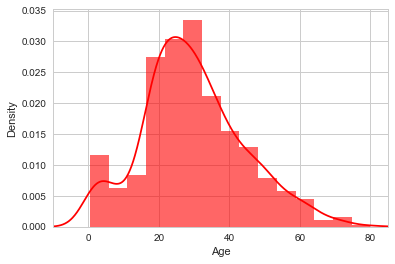

In [76]:
ax = train_df['Age'].hist(bins=15, density=True, stacked=True,
                          color='red', alpha=0.6)
train_df['Age'].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

In [44]:
print("mean age: %.2f" %(train_df['Age'].mean(skipna=True)))
print("median age: %.2f" %(train_df['Age'].median(skipna=True)))

mean age: 29.70
median age: 28.00


In [53]:
print('percent of Cabin missing records: %.2f%%' 
      %((train_df['Cabin'].isnull().sum() / train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%
percent of Cabin missing records: 77.10%


In [54]:
print('percent of Embarked missing records: %.2f%%' 
      %((train_df['Embarked'].isnull().sum() / train_df.shape[0])*100))

percent of Embarked missing records: 0.22%


In [66]:
#Place where most of the passagers embarked

train_df['Embarked'].value_counts().idxmax()

'S'

In [70]:
train_data = train_df.copy()
train_data.fillna(train_df['Age'].median(skipna=True), inplace=True)
train_data.fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [71]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [73]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

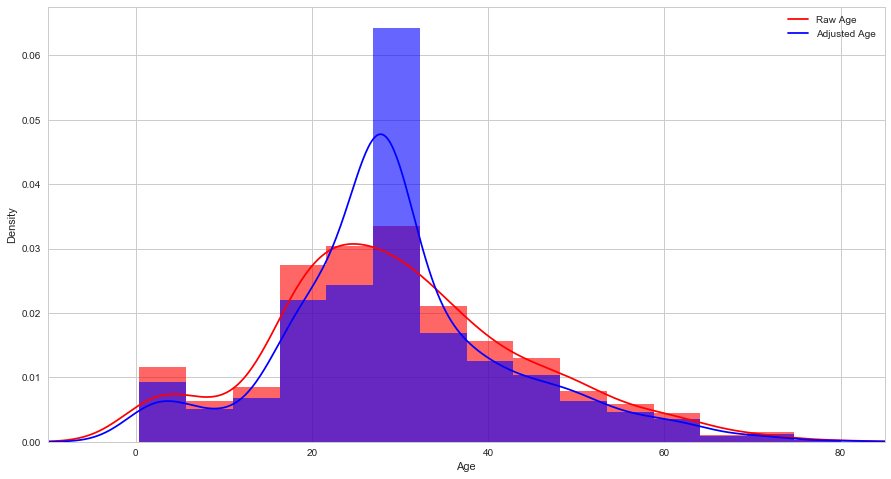

In [82]:
plt.gcf().clear()
plt.figure(figsize=(15, 8))
ax = train_df['Age'].hist(bins=15, density=True, 
                          stacked=True, color="red", alpha=0.6)
train_df['Age'].plot(kind='density', color='red')
ax = train_data['Age'].hist(bins=15, density=True, 
                          stacked=True, color="blue", alpha=0.6)
train_data['Age'].plot(kind='density', color='blue')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

In [83]:
train_data['travel_alone'] = np.where((train_data['SibSp'] 
                                       + train_data['Parch']) > 0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [84]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,travel_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [86]:
training = pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked'])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
final_train = training
final_train.head()

,Survived,Age,Ticket,Fare,travel_alone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_28.0,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,A/5 21171,7.2500,0,0,0,1,1,0,0,0,1
1,1,38.0,PC 17599,71.2833,0,1,0,0,0,0,1,0,0
2,1,26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,0,0,1
3,1,35.0,113803,53.1000,0,1,0,0,0,0,0,0,1
4,0,35.0,373450,8.0500,1,0,0,1,1,0,0,0,1


In [89]:
test_data = test_df.copy()
test_data['Age'].fillna(test_df['Age'].median(skipna=True), inplace=True)
test_data['Fare'].fillna(test_df['Fare'].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
test_data['Travel_Alone'] = np.where((test_df['SibSp' ] 
                                      + test_df['Parch' ]) > 0, 0, 1)
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)
testing = pd.get_dummies(test_data, columns=['Pclass', 'Sex', 'Embarked'])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,Travel_Alone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,1,0,0,1,1,0,1,0
1,47.0,7.0000,0,0,0,1,0,0,0,1
2,62.0,9.6875,1,0,1,0,1,0,1,0
3,27.0,8.6625,1,0,0,1,1,0,0,1
4,22.0,12.2875,0,0,0,1,0,0,0,1


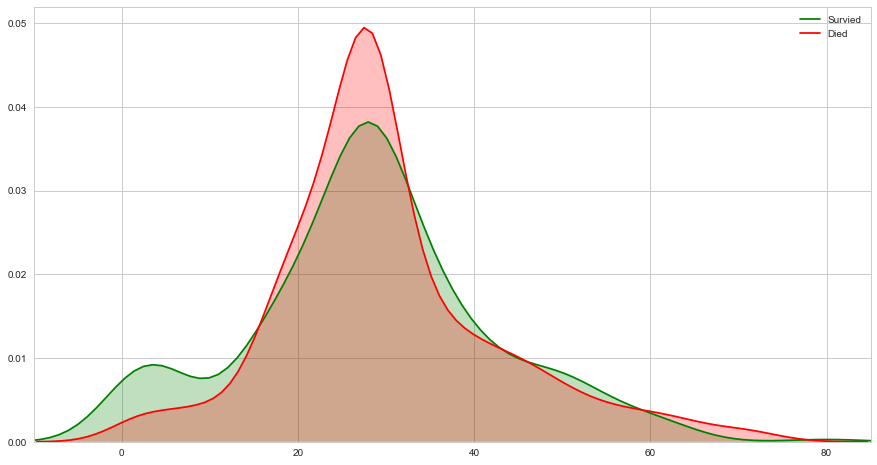

In [95]:
#Exploration of Age

plt.figure(figsize=(15, 8))
ax = sns.kdeplot(final_train['Age'][final_train.Survived == 1], 
                 color = 'green', shade=True)
sns.kdeplot(final_train['Age'][final_train.Survived == 0], 
                 color = 'red', shade=True)
plt.legend(['Survied', 'Died'])
plt.xlim(-10, 85)
plt.show()

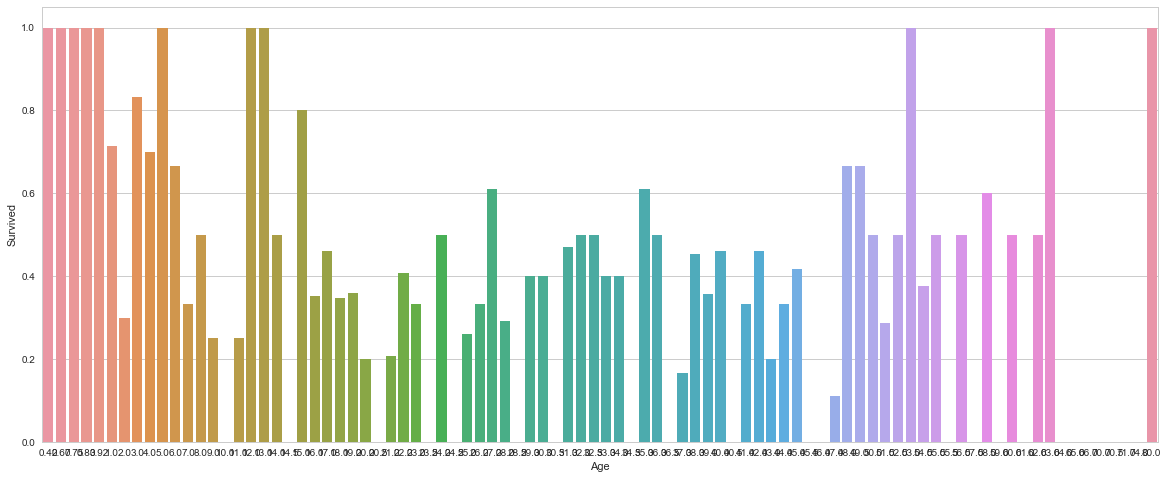

In [101]:
#Exploration of Age (2)

plt.figure(figsize=(20, 8))
avg_survival_by_age = final_train[['Age', 
                                   'Survived']].groupby(['Age'], 
                                                        as_index=False).mean()

sns.barplot(x='Age', y = 'Survived', data=avg_survival_by_age)
plt.show()

In [103]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

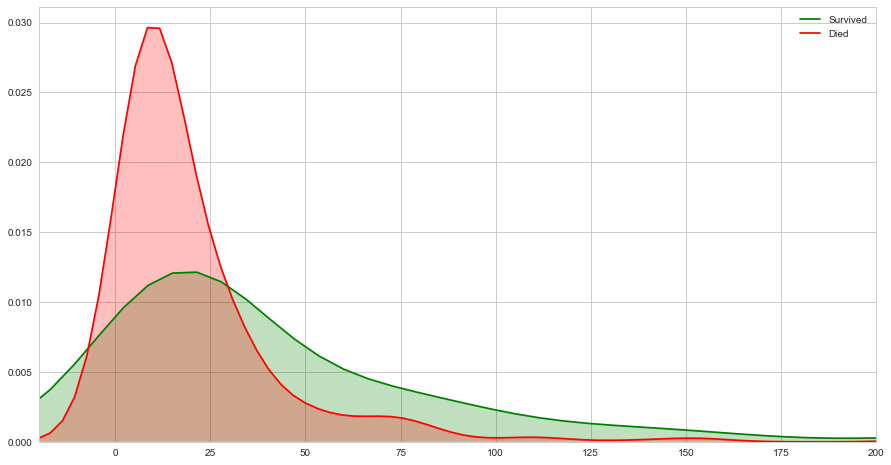

In [109]:
#Exploration of Fare

plt.figure(figsize = (15, 8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1],
                color='Green', shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0],
                color='Red', shade=True)
plt.legend(['Survived', 'Died'])
plt.xlim(-20, 200)
plt.show()

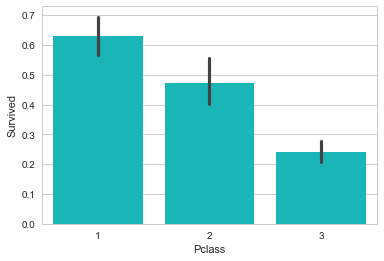

In [126]:
#Exploration of Passanger class

sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
plt.show()

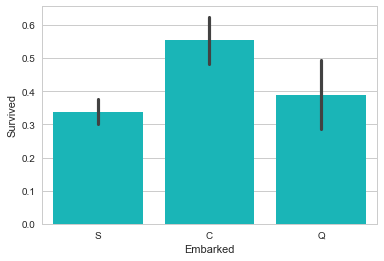

In [127]:
#Exploration of Embarked

sns.barplot('Embarked', 'Survived', data=train_df, color="darkturquoise")
plt.show()

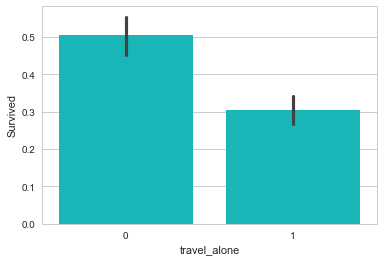

In [132]:
#Exploration of travelling alone vs family

sns.barplot('travel_alone', 'Survived', data=final_train, color="darkturquoise")
plt.show()

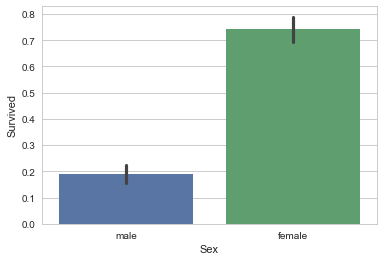

In [141]:
#Exploration of Gender variable
sns.barplot('Sex', 'Survived', data=train_df)
plt.show()

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['Age', 'Fare', 'travel_alone', 
        'Pclass_1', 'Pclass_2',
       'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']

X = final_train[cols]
y = final_train['Survived']

model = LogisticRegression()
rfe = RFE(model, 8)
rfe.fit(X, y)
print("Selected featuires: ", list(X.columns[rfe.support_]))

Selected featuires:  ['Age', 'travel_alone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


Optimal number of features:  8
selected features:  ['Age', 'travel_alone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


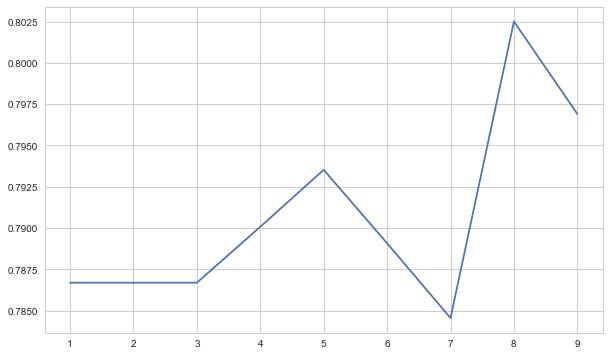

In [150]:
#RFECV : Recursive feature elimination cross validation

from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv = 10, 
             scoring='accuracy')

rfecv.fit(X, y)

print('Optimal number of features: ', rfecv.n_features_)
print('selected features: ', list(X.columns[rfecv.support_]))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()